# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [2]:
url=r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo=pd.read_csv(url,sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [5]:
top5=chipo['item_name'].value_counts().sort_values(ascending=False).head()
top5

item_name
Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='count'>

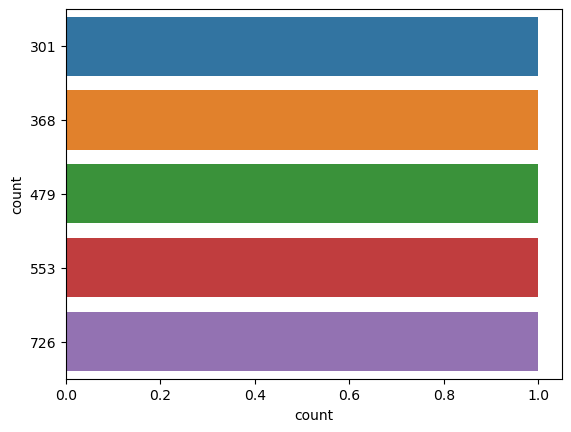

In [6]:
sns.countplot(y=chipo['item_name'].value_counts().sort_values(ascending=False).head())

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [7]:
chipo['price']=chipo['item_price'].str.replace('$',' ')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


In [8]:
chipo.drop(columns='item_price')

,order_id,quantity,item_name,choice_description,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


In [16]:
chipo['price']=chipo['price'].astype(float)

In [17]:
chipo.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price             object
price                 float64
dtype: object

In [33]:
chipo.groupby(['quantity'])['price'].value_counts()

quantity  price
1         8.75     730
          11.25    521
          9.25     398
          4.45     349
          8.49     311
                  ... 
5         7.50       1
7         10.50      1
8         13.52      1
10        15.00      1
15        44.25      1
Name: count, Length: 80, dtype: int64

In [18]:
chipo['price'].agg([min,max])

min     1.09
max    44.25
Name: price, dtype: float64

In [19]:
def pgrp(x):
    if x>=1.0 and x<=9.0:
        return '1-9'
    elif x>9.0 and x<=18.0:
        return '9-18'
    elif x>18.0 and x<=27.0:
        return '18-27'
    elif x>27.0 and x<=36.0:
        return '27-36'
    else:
        return '36-45'

In [20]:
chipo['pricegrp']=chipo['price'].apply(pgrp)

In [21]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,price,pricegrp
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39,1-9
1,1,1,Izze,[Clementine],$3.39,3.39,1-9
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39,1-9
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39,1-9
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98,9-18


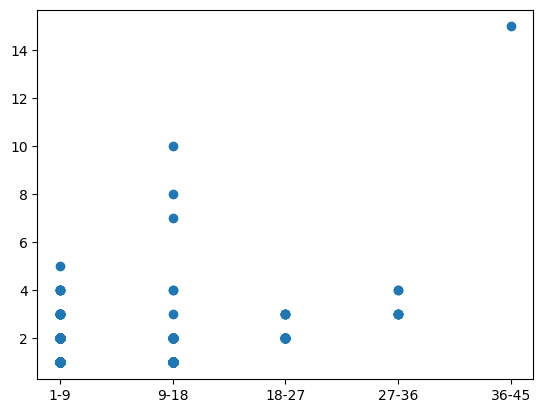

In [28]:
plt.scatter(chipo['pricegrp'],chipo['quantity'])
plt.xlabel='price_group'
plt.ylabel='items_ordered'
plt.show()

In [30]:
chipo.drop(columns='pricegrp')

,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98
...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75,11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75,11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25,11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75,8.75


### Step 7. BONUS: Create a question and a graph to answer your own question.